# Data Understanding and Exploration


Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
Housing = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 80 columns, and couple of NULL values which need to be cleaned and processed.
print(Housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# head
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### To analyze and understand data quality issues we are splitting data into two types for better understanding.

In [5]:
# Splitting data into Numerical and Categorical variable for ease in understanding them and processing them properly.
Housing_Num = Housing.select_dtypes(include=['float64', 'int64'])
Housing_Num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
Housing_Cat = Housing.select_dtypes(include=['object'])
Housing_Cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Numeric Data Analysis
Combined analysis and comments based on Data definations are given below. Comments are only on our assumptions and columns which will be outstanding or redundant.
Rest of the columns are self explanatory.

- Id Column will be dropped as it has no relevance in data.
- The numeric values at MSSubClass,OverallQual,OverallCond represent how valueable a house will be in linear order so we are keeping it as it is.
- We are not touching variables such as Year build,YearRemodAdd yet. We will drop them using RFE based on thier correlation with target variable.
- Due to low number of sample data and high number of features we are dropping them due to low correlation.
- GarageYrBlt column will be dropped as it has missing values and low correlation with target variable.


In [7]:
Housing_Num = Housing_Num.drop(['Id','GarageYrBlt','LotFrontage','MasVnrArea'], axis=1)
#Housing_Num.info()

In [8]:
# plotting correlations
Housing_Num.corr()

# cannot read/visualize heatmap yet due to high number of features. 

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


#### Categorical Data Analysis
Combined analysis and comments based on Data definations are given below. Comments are only on our assumptions and columns which will be outstanding or redundant.
Rest of the columns are self explanatory.

- Adding SalePrice column in our Categorical dataframe to view Correlation with a column before dropping
- For variables with Null values while creating dummy variables we are not dropping one value as the missing value will be interpreted as there is NAN at this feature for example Alley has 91 counts of data for rest of the 1369 samples we will interpret "Grvl" & "Pave" = 0.

In [9]:
Columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Columns_WithNull = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                   'PoolQC', 'Fence', 'MiscFeature']

In [10]:
Housing_Cat['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [11]:
Housing_Cat.columns
#Housing_Cat.info()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
# Creating Dummy Variables
Housing_dummies1 = pd.get_dummies(Housing_Cat[Columns], drop_first=True)
Housing_dummies1.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
Housing_dummies2 = pd.get_dummies(Housing_Cat[Columns_WithNull], drop_first=True)
Housing_dummies2.head()

,Alley_Pave,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,...,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


#### Now let us concat everything into one dataframe which will be used for model building.

In [14]:
Housing_Final = pd.concat([Housing_Num, Housing_dummies1, Housing_dummies2], axis = 1)
Housing_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 243 entries, MSSubClass to MiscFeature_TenC
dtypes: int64(34), uint8(209)
memory usage: 685.9 KB


In [15]:
#There is huge data difference between Saleprice values and other features. 
#Let us scale that data in order to get better results.

Housing_Final['SalePrice'] = np.log10(Housing_Final['SalePrice'])

#FINAL DATA SET IS READY...

# Model Building and Evaluation

We see there are total 1460 samples and 242 columns/features in our study based on our final data set.
Let us first try doing RFE with normal linear regression algorithm and check output.

In [16]:
#Create X and Y dataframes based on our requirement.
X = Housing_Final
X = X.drop(['SalePrice'], axis=1)
y = Housing_Final['SalePrice'] # response variable in Y

In [17]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,1,0,0,0,0,0,0,0,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,1,0,0,0,0,0,0,0,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,1,0,0,0,0,0,0,0,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,1,0,0,0,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,1,0,0,0,0,0,0,0,0


In [18]:
y.head()

0    5.319106
1    5.258877
2    5.349278
3    5.146128
4    5.397940
Name: SalePrice, dtype: float64

In [19]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [20]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Fa', 'PoolQC_Gd',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object', length=242)

## Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [21]:
#It makes no sense to fit our model on total 242 Features, let us use RFE first to automate and select top correlated features.
#RFE
from sklearn.feature_selection import RFE

#This will hold all the number of features we are going for analysis of our data. This number is fine tuned by trail and error.
Features = 55
#Libraries for Statistical Analysis and Regression
import statsmodels
import statsmodels.api as sm
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,Features)		# running rfe
rfe = rfe.fit(X_train,y_train)


In [22]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageCars',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Twnhs', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Wood',
       'Heating_GasA', 'Heating_GasW', 'HeatingQC_Po', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Sev',
       'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_New',
       'Sal

In [23]:
X_train_sm =  sm.add_constant(X_train[col])

X_test_sm =  sm.add_constant(X_test[col])

In [24]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_sm, y_train)

LinearRegression()

In [25]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

609618071248.184
[ 1.03001419e-17  4.81339487e-02  3.48021565e-02  6.05006977e-02
 -2.95227456e-02  3.82527120e-02  1.67566255e-01  2.20326713e-01
  1.95645847e-01  1.50138793e-01 -8.11302227e-02  3.66124999e-02
  5.96946207e-02  9.17043131e-02  9.51964135e-02  3.99393626e-02
  2.85209775e-02 -4.39528751e-01  1.33316090e-01 -6.39433388e-02
 -6.09618071e+11 -6.09618071e+11 -6.09618071e+11 -6.09618071e+11
 -6.09618071e+11 -6.09618071e+11 -6.09618071e+11 -7.55919240e+11
 -2.06241699e-01  4.33253903e-02  2.32503718e+11  5.90056177e-02
  7.55919240e+11 -2.32503718e+11  3.39130775e-02  2.84370570e-02
  9.05849272e-02  9.21400999e-02  1.48153368e-01 -1.49128805e-01
 -9.55335400e-02 -5.90040738e-02 -7.82834752e-02 -1.05144557e-01
 -1.26501653e-01  1.12994677e-02  3.96602823e-02  6.35888505e+11
  2.66824769e-02 -6.35888505e+11  3.78108655e-02  7.69255901e-02
 -4.38667562e-02 -3.00454757e-02  4.86845213e-02 -6.09618071e+11]


In [26]:
y_pred_train = lm.predict(X_train_sm)
y_pred_test = lm.predict(X_test_sm)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8647847069843814
-2.2799708257023808e+23
4.093063487274012
3.0991587540101786e+24
0.004008877068828611
7.075704917831458e+21


#### Conclusion so far
So far we used RFE with 30,40,50,60 and 100 features. Our model is clearly overfitting here, in all cases.
In order to tackle this we will use Ridge and Lasso Regression and see which one works better and finalize our analysis.

We are not going to check error points here as this model is clearly not working.

## Ridge and Lasso Regression

Let's now try predicting Housing prices, a dataset used in simple linear regression, to perform ridge and lasso regression.
- We are using trial and error method here to optimize our outcome using rfe and set number of features.

## Ridge Regression

In [27]:
rfe = RFE(lm,Features)		# running rfe
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_sm =  sm.add_constant(X_train[col])
X_test_sm =  sm.add_constant(X_test[col])
col

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageCars',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Twnhs', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Wood',
       'Heating_GasA', 'Heating_GasW', 'HeatingQC_Po', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Sev',
       'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_New',
       'Sal

In [28]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [29]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [30]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_sm, y_train)
print(ridge.coef_)

[ 0.00000000e+00  5.21667598e-02  3.61969665e-02  5.85568156e-02
 -2.61506172e-02  4.13266366e-02  2.43618857e-02  5.21948862e-02
  5.72422565e-02  9.37669896e-03 -7.72347846e-03  3.15467830e-02
  5.67110766e-02  7.52566277e-02  7.75483948e-02  3.24183696e-02
  2.50848841e-02 -5.85351798e-02  1.97999240e-02 -5.85566895e-02
  1.28318186e-03  3.78985069e-04 -1.04035678e-02  2.80769247e-03
  6.78839627e-03  2.33965226e-02  3.39260831e-02 -8.67659265e-03
 -3.94057192e-02  3.52821255e-02 -2.75135166e-06  2.13340345e-02
 -8.67659265e-03 -2.75135166e-06  2.97712906e-02  2.48161809e-02
  2.18014617e-02  4.43245438e-02  5.17954741e-02 -1.88964294e-02
 -6.07258160e-02 -3.57947670e-02 -5.45768318e-02 -3.57341075e-02
 -1.36443599e-02  1.19118814e-02  8.03663093e-03  2.41336252e-02
  2.97883762e-02  2.41336252e-02  3.30992596e-02  3.13181437e-02
 -3.37161127e-02 -1.10107568e-02  4.41042395e-03 -5.81772936e-02]


In [31]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_sm)
y_pred_test = ridge.predict(X_test_sm)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8441575107291497
0.8292772159778709
4.717463449394952
2.3206306179298326
0.004620434328496525
0.005298243419931125


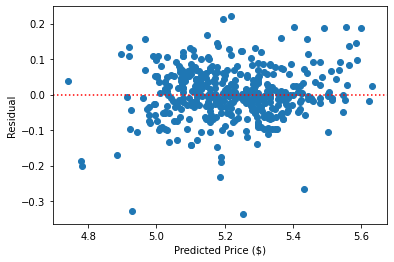

In [32]:
#residual
residual = y_test - y_pred_test
plt.scatter( y_pred_test , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residual")
plt.show()

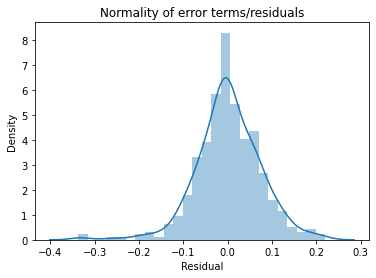

In [33]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

We see that error terms are normally distributed and do not hold any pattern. This is a positive aspect.

## Lasso

In [34]:
rfe = RFE(lm,Features)		# running rfe
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_sm =  sm.add_constant(X_train[col])
X_test_sm =  sm.add_constant(X_test[col])

In [35]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002,0.0005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [37]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_sm, y_train) 

Lasso(alpha=0.0005)

In [38]:
#? lasso
print(((abs(lasso.coef_))))

[0.         0.05585952 0.03708733 0.0566334  0.01850735 0.04270044
 0.         0.0139447  0.04072601 0.0071462  0.         0.0260676
 0.05237569 0.07020859 0.07149535 0.02583805 0.02150601 0.
 0.         0.05193676 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02494155
 0.         0.         0.         0.         0.02547038 0.01952424
 0.         0.01168007 0.         0.         0.04574203 0.02133836
 0.04130852 0.         0.         0.00775058 0.         0.01697338
 0.02192498 0.01964161 0.03035425 0.         0.02247606 0.
 0.         0.        ]


In [39]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_sm)
y_pred_test = lasso.predict(X_test_sm)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8300267003846538
0.8264488533389662
5.14521317042665
2.3590764819429215
0.005039386063101518
0.005386019365166488


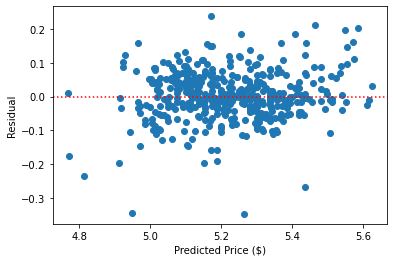

In [40]:
#residual
residual = y_test - y_pred_test
plt.scatter( y_pred_test , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residual")
plt.show()

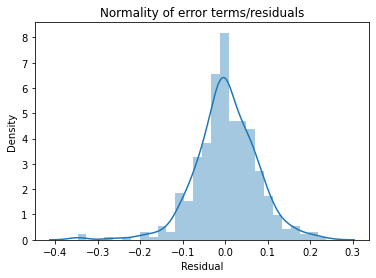

In [41]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

Same as Ridge model we see that error terms are normally distributed and do not hold any pattern.

In [42]:
#Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.647847e-01,0.844158,0.830027
1,R2 Score (Test),-2.279971e+23,0.829277,0.826449
2,RSS (Train),4.093063e+00,4.717463,5.145213
3,RSS (Test),3.099159e+24,2.320631,2.359076
4,MSE (Train),6.331569e-02,0.067974,0.070989
5,MSE (Test),8.411721e+10,0.072789,0.073390


## Final Conclusion

- As you can see from final metrics table above there is huge difference between Normal Linear Regression and Ridge/Lasso Regression.
- In standard linear Regression our model was clearly overfitting and we have no control over data.
- In Ridge Regression our model performs extremely compared to standard set-up. Same with Lasso.
- Lasso pushes some coefficients to be exactly 0 and thus performs variable selection. However we can see Ridge is performing well compared to Lasso. This means all the variables coming from RFE here are related to target variable.